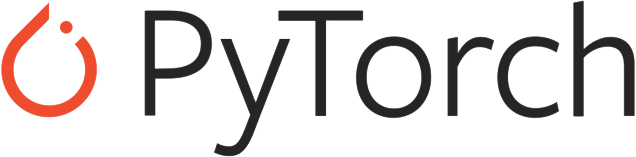
# Machine Learning for Adaptive Optics Workshop

Benjamín González Barraza

03-10-2025

In [ ]:
!git clone https://github.com/FOGuzman/carpetaMadre.git
%cd carpetaMadre

## What is PyTorch?

PyTorch is an open-source deep learning framework designed to make building and training neural networks straightforward. It offers a flexible, Python interface that’s easy to debug and extend, and it natively taps into GPUs to speed up data processing and training. Thanks to a large community and a rich ecosystem of pretrained models and libraries, PyTorch is a go-to choice for deploying deep learning solutions.

## Does Colab already include PyTorch?

Yes — Google Colab ships with PyTorch preinstalled.  
Run the cell below to confirm the version and check if a GPU is available.  


## What does `torch.cuda.is_available()` check?

`torch.cuda.is_available()` returns **True** if PyTorch detects a working CUDA setup and can use a GPU through its CUDA API.  
If it returns **False**, PyTorch will run on the **CPU** instead.


In [1]:
import torch
torch.cuda.is_available()

True

If GPU shows **False**, go to **Runtime → Change runtime type → Hardware accelerator → GPU** and rerun.

### Interpreting the version & CUDA info

- `torch.__version__` — the **PyTorch package version** you installed.
- `torch.version.cuda` — the **CUDA toolkit version PyTorch was built with** (compile-time).
- `torch.cuda.get_device_name(0)` — the **actual GPU model** available at runtime (if any).

These numbers can differ (e.g., PyTorch built with CUDA 12.1, running on a system with a newer driver).

In [2]:
print('PyTorch:', torch.__version__)
print('CUDA available:', torch.cuda.is_available())
print('CUDA toolkit (built with):', torch.version.cuda)

device = 'cuda' if torch.cuda.is_available() else 'cpu'

print('Device:', torch.cuda.get_device_name(0) if device=='cuda' else 'CPU')

PyTorch: 2.8.0+cu129
CUDA available: True
CUDA toolkit (built with): 12.9
Device: NVIDIA RTX 6000 Ada Generation


## PyTorch Tensors

A **tensor** is a multidimensional array (scalars, vectors, matrices, and higher-rank arrays) and is the basic unit of computation in PyTorch.

Tensors let you:
- Represent numeric data with specific dtypes (e.g., `float32`, `float64`, `int64`).
- Move data between **CPU** and **GPU** to accelerate operations.
- Carry gradients (`requires_grad=True`) for training via autograd.
- More

Example: Python scalar vs. PyTorch tensor

Below we compare an integer with a PyTorch tensor 


In [3]:
A = torch.tensor(1)
B = 1
print(A)
print(B)

tensor(1)
1


## Declaring tensors

There are many ways to create tensors in PyTorch.  
We’ll start with `torch.zeros((a, b))`, which creates a 2D tensor (matrix) of shape `(a, b)` filled with zeros.


In [4]:
A = torch.zeros((2,3))
print(A)

tensor([[0., 0., 0.],
        [0., 0., 0.]])


## Tensor attributes

PyTorch tensors expose a set of attributes you’ll use constantly:

- **`x.shape` / `x.size()`** — The tensor’s dimensions. `size()` and `shape` return the same info (e.g., `(a, b)` for a 2-D matrix).
- **`x.ndim`** — The number of dimensions (tensor rank). For a matrix `(a, b)`, `ndim == 2`.
- **`x.dtype`** — The data type (e.g., `torch.float32`, `torch.float64`, `torch.int64`).  
  *Note:* only floating/complex dtypes can track gradients.
- **`x.device`** — Where the tensor lives: `cpu` or `cuda:0` (etc.). Move with `x.to(device)`, `x.cpu()`, `x.cuda()`.
- **`x.numel()`** — Total number of elements (same as `x.nelement()`).
- **`x.requires_grad`** — If `True`, autograd will track ops on `x` and accumulate gradients into `x.grad` when you call `backward()`.
- **`x.grad` / `x.grad_fn`** —  
  - `x.grad` holds the gradient **after** `backward()` runs, but only for **leaf** tensors with `requires_grad=True`.  
  - `x.grad_fn` is the function that produced the tensor; it’s **`None` for leaf tensors**, and set (e.g., `AddBackward0`) for results of operations.




In [5]:
print(A.shape, A.size())
print(A.ndim)
print(A.dtype)
print(A.device)
print(A.numel())
print(A.requires_grad)
print(A.grad)

torch.Size([2, 3]) torch.Size([2, 3])
2
torch.float32
cpu
6
False
None


## Operations with tensors

Most **NumPy-style** operations exist in PyTorch with similar semantics.  
You can use **operators** (`+`, `-`, `*`, `/`, `@`) or **functional forms** (`torch.add`, `torch.mul`, `torch.matmul`, …).  
Broadcasting, advanced indexing, reductions, and linear algebra follow familiar NumPy patterns—plus GPU and autograd support.

**Common families**
- **Elementwise & broadcasting:** `+ - * /`, `torch.add/mul/div`, `torch.exp/log/sqrt`, `torch.clamp`, …
- **Reductions:** `x.sum(dim=...)`, `x.mean`, `x.max`, `x.argmax`, `x.std`, …
- **Linear algebra:** `@`, `torch.matmul`, `torch.mm`, `torch.mv`, `torch.linalg.inv`, `torch.linalg.svd`, `torch.einsum`
- **Reshaping:** `x.view`, `x.reshape`, `x.permute`, `x.transpose`, `x.squeeze/unsqueeze`, `x.flatten`
- **Join/split:** `torch.cat`, `torch.stack`, `torch.split`, `torch.chunk`
- **Indexing/masks:** slices, boolean masks, `gather`, `where`
- **Type/device:** `x.to(dtype/device)`, `x.float()`, `x.cuda()`, `x.cpu()`
- **In-place ops:** methods ending in `_` (e.g., `x.add_(1)`) — use with care when using autograd.


In [6]:
# Elementwise, broadcasting, reductions, matmul
import torch

a = torch.randn(2, 3)
b = torch.ones(1, 3)         # broadcasts over dim 0
c = a * 2 + b                # elementwise + broadcasting
m = a @ (torch.randn(3, 4))  # matrix multiply → (2, 4)

print("c.shape:", c.shape, "| m.shape:", m.shape)
print("sum over rows:", c.sum(dim=1))
print("mean all elements:", c.mean())
print("argmax per row:", c.argmax(dim=1))


c.shape: torch.Size([2, 3]) | m.shape: torch.Size([2, 4])
sum over rows: tensor([0.9945, 2.9490])
mean all elements: tensor(0.6573)
argmax per row: tensor([0, 1])


In [7]:
# Reshape / view / permute + concat/stack
x = torch.arange(12.)                            # 1D: (12,)
x2 = x.view(3, 4)                                # view if contiguous
x3 = x2.permute(1, 0).contiguous()               # (4, 3), ensure contiguous if needed
flat = x3.reshape(-1)                            # safe reshape to 1D

cat = torch.cat([x2, x2], dim=0)                  # (6, 4)
stk = torch.stack([x2, x2], dim=0)                # (2, 3, 4)

print("x2:", x2.shape, "x3:", x3.shape, "flat:", flat.shape)
print("cat:", cat.shape, "stack:", stk.shape)

x2: torch.Size([3, 4]) x3: torch.Size([4, 3]) flat: torch.Size([12])
cat: torch.Size([6, 4]) stack: torch.Size([2, 3, 4])


In [8]:
# Indexing, boolean masks, where
M = torch.randn(4, 4)
mask = M > 0
pos = M[mask]
M2 = torch.where(M > 0, M, torch.zeros_like(M))   # keep positives, zero else

print("positives count:", pos.numel())
print("M2 nonneg min/max:", M2.min().item(), M2.max().item())

positives count: 11
M2 nonneg min/max: 0.0 1.5551376342773438


## Tensors on GPU

By default, tensors you create live on the **CPU**. To fully leverage PyTorch performance, you can move tensors (and models) to a **GPU** and perform operations there.

Why GPUs? They’re optimized for massively parallel floating-point math, so many tensor ops (e.g., matrix multiplies, convolutions) run much faster than on CPUs.

**How to use the GPU in PyTorch**
- Pick a device: `device = torch.device("cuda")` if `torch.cuda.is_available()` else `"cpu"`.
- Move existing tensors: `x = x.to(device)` or `x = x.cuda()` / `x = x.cpu()`.
- Create tensors directly on the target device: `torch.zeros((a, b), device=device)`.
- Models must be on the same device as their inputs: `model.to(device); out = model(x.to(device))`.
- Avoid frequent CPU↔GPU transfers inside loops; move once and keep data on the GPU.


In [9]:
# 1) Check CUDA and pick a device
import torch

cuda = torch.cuda.is_available()
print("CUDA available:", cuda)
if cuda:
    print("GPU:", torch.cuda.get_device_name(0))

device = torch.device("cuda" if cuda else "cpu")


CUDA available: True
GPU: NVIDIA RTX 6000 Ada Generation


In [10]:
# 2) Move tensors to GPU (or create them there)

# A CPU tensor
A = torch.zeros((3, 4))               # lives on CPU by default
print("A.device (before):", A.device)

# Move to target device
A = A.to(device)
print("A.device (after):", A.device)

# Create directly on device (preferred)
B = torch.randn((3, 4), device=device)
C = torch.ones_like(B)                 # inherits shape/dtype/device
print("B.device:", B.device, "| C.device:", C.device)

# Do some ops on the chosen device
Z = A + B + C
print("Z.shape:", Z.shape, "| Z.device:", Z.device)


A.device (before): cpu
A.device (after): cuda:0
B.device: cuda:0 | C.device: cuda:0
Z.shape: torch.Size([3, 4]) | Z.device: cuda:0


## GPU devices and indices (`cuda:0`, `cuda:1`, …)

When a tensor’s device shows `cuda:0`, it means the tensor lives in **GPU memory (VRAM)** on GPU **ID 0**.  
If you have multiple GPUs, you can place tensors on different devices: `cuda:0`, `cuda:1`, …, `cuda:N`.

> **Note:** The numbering refers to *visible* GPUs and can be affected by the `CUDA_VISIBLE_DEVICES` environment variable.


In [11]:
import torch

print("CUDA available:", torch.cuda.is_available())
print("GPU count:", torch.cuda.device_count())
for i in range(torch.cuda.device_count()):
    print(f"GPU {i}:", torch.cuda.get_device_name(i))


CUDA available: True
GPU count: 8
GPU 0: NVIDIA RTX 6000 Ada Generation
GPU 1: NVIDIA RTX 6000 Ada Generation
GPU 2: NVIDIA RTX 6000 Ada Generation
GPU 3: NVIDIA RTX 6000 Ada Generation
GPU 4: NVIDIA RTX 6000 Ada Generation
GPU 5: NVIDIA RTX 6000 Ada Generation
GPU 6: NVIDIA RTX 6000 Ada Generation
GPU 7: NVIDIA RTX 6000 Ada Generation


## All tensors in an operation must be on the **same device**

PyTorch won’t implicitly move tensors across devices for you.  
If operands live on different devices (e.g., `cpu` and `cuda:0`), you’ll get an error.


In [12]:
import torch

# Example mismatch
cpu_t = torch.ones((2, 2))                       # CPU
if torch.cuda.is_available():
    gpu_t = torch.ones((2, 2), device="cuda:0")  # GPU

    # This will raise a device mismatch error
    try:
        cpu_t + gpu_t
    except RuntimeError as e:
        print("Device mismatch error:\n ", e)

    # Fix: move one tensor so both are on the same device
    fixed = cpu_t.to("cuda:0") + gpu_t
    print("OK after .to('cuda:0') → device:", fixed.device)

Device mismatch error:
  Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!
OK after .to('cuda:0') → device: cuda:0


## Are GPU computations really faster?

Often **yes** for large, parallelizable workloads (e.g., big matrix multiplies, convolutions).  
However, for **small tensors** or **many tiny ops**, CPU can be similar or faster due to transfer/launch overheads.  
Performance depends on tensor size, dtype (FP32/FP16/BF16/FP64), hardware, and how often you move data between CPU and GPU.


## What does `torch.cuda.synchronize()` do?

CUDA ops in PyTorch are **asynchronous**: they enqueue work on the GPU and return immediately.  
`synchronize()` **waits** until all queued GPU work is finished. You typically **don’t need it** for correctness. PyTorch syncs implicitly at certain points (e.g., when copying a tensor to CPU with `.cpu()/.numpy()`, or calling `.item()` on a CUDA tensor).  
Use `synchronize()` mainly for **accurate timing/benchmarking** or when you explicitly need a barrier between GPU tasks.


In [13]:
# Quick (optional) benchmark: CPU vs GPU matmul
import torch, time

def bench_matmul(n=2048, device="cpu", iters=5):
    x = torch.randn((n, n), device=device)
    y = torch.randn((n, n), device=device)
    if device.startswith("cuda"):
        torch.cuda.synchronize()  # ensure fair timing start
    t0 = time.perf_counter()
    for _ in range(iters):
        z = x @ y
    if device.startswith("cuda"):
        torch.cuda.synchronize()  # ensure kernels finished
    return (time.perf_counter() - t0) / iters

size_matrix = 2048

cpu_t = bench_matmul(n=size_matrix, device="cpu", iters=10)
print(f"CPU avg: {cpu_t*1000:.3f}ms")

if torch.cuda.is_available():
    gpu_t = bench_matmul(n=size_matrix, device="cuda:0", iters=10)
    print(f"GPU avg: {gpu_t*1000:.3f}ms")


CPU avg: 13.783ms
GPU avg: 5.648ms


In [14]:
# Timing example with/without synchronize (optional)
import torch, time

if torch.cuda.is_available():
    x = torch.randn((4096, 4096), device="cuda:0")
    y = torch.randn((4096, 4096), device="cuda:0")

    # Incorrect timing (may be too small because of async execution)
    t0 = time.perf_counter()
    z = x @ y
    t1 = time.perf_counter()
    print("Naive timing:", (t1 - t0)*1000, "ms (likely underestimates)")

    # Correct timing with explicit sync
    torch.cuda.synchronize()
    t0 = time.perf_counter()
    z = x @ y
    torch.cuda.synchronize()
    t1 = time.perf_counter()
    print("Synced timing:", (t1 - t0)*1000, "ms (actual elapsed)")


Naive timing: 0.3006681799888611 ms (likely underestimates)
Synced timing: 3.11391893774271 ms (actual elapsed)


## Gradients, computation graphs, and backpropagation

PyTorch includes **autograd**, a system that **records what you do** to tensors during the forward pass and then **automatically computes gradients** (derivatives) for you during the backward pass.

### What are gradients?
Gradients tell you **how much a change in a parameter changes the loss** (and in which direction). They are the “compass” that points updates the right way during training.

### What is a computation graph?
As you do operations (add, multiply, matmul, etc.), PyTorch builds a **graph** that connects inputs → outputs.  
It’s **dynamic**: the graph is created on the fly each time you run your Python code, so `if/for/while` just work naturally.

### What is backpropagation?
After you compute a single **scalar** loss (a single number), calling `loss.backward()` walks **backwards** through that graph and fills in the `.grad` field of any **leaf tensors** that asked for gradients (`requires_grad=True`).  
If your output isn’t a single number, you must provide an “upstream” gradient: `y.backward(grad)` where `grad` has the same shape as `y`.

### How it works in practice
1. Create parameters/tensors with `requires_grad=True`.  
2. Do a **forward pass** to compute a **loss** (a single number).  
3. Call `loss.backward()` to compute gradients.  
4. Read/update parameters (e.g., with an optimizer) and **reset grads** before the next step.

### Handy controls
- **Turn off tracking** when you don’t need gradients (e.g., inference):  
  `with torch.no_grad(): ...` or `x = x.detach()`
- **Intermediate results** don’t keep `.grad` by default (only leaf tensors do).  
  If you want to inspect them, call `t.retain_grad()` (optional/advanced).
- **Gradients accumulate** across steps. Clear them with `param.grad = None` (preferred) or `param.grad.zero_()` each iteration.


In [15]:
# 1) Minimal autograd demo: scalar output → simple backward
import torch

x = torch.tensor([2.0, -1.0, 3.0], requires_grad=True)   # leaf tensor
# f(x) = 1/2 * sum(x^2)  → df/dx = x
y = 0.5 * (x**2).sum()
y.backward()  # computes ∂y/∂x
print("x.grad (should equal x):", x.grad)


x.grad (should equal x): tensor([ 2., -1.,  3.])


In [16]:
# 2) Non-scalar output: provide an upstream gradient to backward
import torch

A = torch.randn(2, 3, requires_grad=True)
s = (A**2).sum(dim=1)                # shape: (2,)  ← non-scalar output
upstream = torch.tensor([1.0, 0.5])  # weights for each component
s.backward(upstream)                 # J^T · upstream
print("A.grad shape:", A.grad.shape)


A.grad shape: torch.Size([2, 3])


In [17]:
# 3) Gradients accumulate; clear them between steps
import torch

w = torch.randn(3, 3, requires_grad=True)

for step in range(3):
    # Preferred clearing method: set to None (lets PyTorch allocate lazily next time)
    w.grad = None

    out = (w @ w.t()).sum()   # simple scalar "loss"
    out.backward()
    print(f"step {step} | grad norm:", w.grad.norm().item())


step 0 | grad norm: 12.824451446533203
step 1 | grad norm: 12.824451446533203
step 2 | grad norm: 12.824451446533203


In [18]:
# 4) Detach / no_grad / retain_grad on intermediates
import torch

x = torch.randn(4, requires_grad=True)
h = x * 3.0                   # non-leaf intermediate
h.retain_grad()               # keep grad for inspection
loss = (h**2).sum()
loss.backward()
print("h.grad (kept via retain_grad):", h.grad)

# Stop tracking:
with torch.no_grad():
    z = h + 1                 # no graph recording here

z_detached = h.detach()        # also stops tracking
print("Requires grad? h:", h.requires_grad, "| z(no_grad):", z.requires_grad, "| z_detached:", z_detached.requires_grad)


h.grad (kept via retain_grad): tensor([ -2.4775,  -3.9115,   2.4936, -11.3991])
Requires grad? h: True | z(no_grad): False | z_detached: False


In [19]:
# Autograd: out-of-place vs in-place; no_grad for inference
w = torch.randn(3, 3, requires_grad=True)
inp = torch.randn(5, 3)
out = inp @ w        # uses matmul; creates grad_fn on out
loss = out.pow(2).mean()
loss.backward()
print("w.grad norm:", w.grad.norm().item())

with torch.no_grad():  # turn off grad tracking (e.g., inference)
    pred = inp @ w
    w.add_(0.0)        # in-place is fine here since autograd is disabled


w.grad norm: 1.625781536102295


## Enabling gradients (memory note)

When you create a tensor with `requires_grad=True`, PyTorch starts **recording the operations** you apply to it so it can compute gradients later.  
This tracking **uses extra memory** (to store intermediate results and graph metadata). After you’re done (e.g., during inference), you can avoid this overhead with:
- `with torch.no_grad(): ...` or
- `x = x.detach()` to stop tracking a tensor.

> **Only floating or complex tensors can require gradients.** Integer tensors (`int32/int64`, etc.) cannot track gradients.

Below, let’s do a simple **multiplication** and backpropagate to see the gradients.


### Elementwise example: \(F = \sqrt{x^2 + y^2}\)

- `grad_fn` shows the **operation that produced a tensor** (the last node in the graph for that tensor).
  - For a scalar multiplication like `B = 3.0 * A`, you’ll typically see **`MulBackward0`**.
  - For our \($F=\sqrt{x^2+y^2}$\) example, you’ll typically see **`SqrtBackward0`**.
- To **get gradients**, call `.backward()` on a **scalar**:
  - Reduce vector outputs to a scalar (e.g., `F.sum().backward()`), **or**
  - Provide an upstream gradient: `F.backward(torch.ones_like(F))`.

Analytic partial derivatives:
\[
$\frac{\partial F}{\partial x}=\frac{x}{\sqrt{x^2+y^2}}$,$\qquad$
$\frac{\partial F}{\partial y}=\frac{y}{\sqrt{x^2+y^2}}$.
\]


In [20]:
import torch

# Two small float tensors that require gradients
x = torch.tensor([ 2.0, -1.0,  3.0], requires_grad=True)
y = torch.tensor([ 0.5,  4.0, -2.0], requires_grad=True)

# F = sqrt(x^2 + y^2)  (elementwise)
F = torch.sqrt(x**2 + y**2)
print("F:", F)
print("F.grad_fn:", type(F.grad_fn).__name__)   # typically 'SqrtBackward0'

# (Optional) show grad_fn for a scalar multiplication
B = 3.0 * x
print("B.grad_fn (scalar multiply):", type(B.grad_fn).__name__)  # typically 'MulBackward0'

# Backprop: reduce to a scalar loss, then backward
loss = F.sum()          # scalar
loss.backward()         # computes d(loss)/dx and d(loss)/dy

print("\nx.grad:", x.grad)
print("y.grad:", y.grad)

# Check against analytic gradients: x/F and y/F
eps = 1e-12
x_analytic = x.detach() / (F.detach() + eps)
y_analytic = y.detach() / (F.detach() + eps)

print("\nMatches analytic ∂F/∂x?", torch.allclose(x.grad, x_analytic, rtol=1e-5, atol=1e-7))
print("Matches analytic ∂F/∂y?", torch.allclose(y.grad, y_analytic, rtol=1e-5, atol=1e-7))


F: tensor([2.0616, 4.1231, 3.6056], grad_fn=<SqrtBackward0>)
F.grad_fn: SqrtBackward0
B.grad_fn (scalar multiply): MulBackward0

x.grad: tensor([ 0.9701, -0.2425,  0.8321])
y.grad: tensor([ 0.2425,  0.9701, -0.5547])

Matches analytic ∂F/∂x? True
Matches analytic ∂F/∂y? True


In [21]:
import torch

# Fresh tensors (so grads start as None)
x = torch.tensor([ 2.0, -1.0,  3.0], requires_grad=True)
y = torch.tensor([ 0.5,  4.0, -2.0], requires_grad=True)

F = torch.sqrt(x**2 + y**2)
print("F:", F)

# Option A (recommended): reduce to a scalar, then backward
F.sum().backward()

print("Autodiff gradients")
print("x.grad:", x.grad)
print("y.grad:", y.grad)

print("\nComparison with analytic gradients")
den = torch.sqrt(x.detach()**2 + y.detach()**2) + 1e-12
print("x / sqrt(x^2 + y^2):", x.detach() / den)
print("y / sqrt(x^2 + y^2):", y.detach() / den)


F: tensor([2.0616, 4.1231, 3.6056], grad_fn=<SqrtBackward0>)
Autodiff gradients
x.grad: tensor([ 0.9701, -0.2425,  0.8321])
y.grad: tensor([ 0.2425,  0.9701, -0.5547])

Comparison with analytic gradients
x / sqrt(x^2 + y^2): tensor([ 0.9701, -0.2425,  0.8321])
y / sqrt(x^2 + y^2): tensor([ 0.2425,  0.9701, -0.5547])


In [22]:
# Reset grads and do backward with an explicit upstream gradient
x.grad = None
y.grad = None

F = torch.sqrt(x**2 + y**2)
F.backward(torch.ones_like(F))  # provide grad for non-scalar output

print("Autodiff gradients (with explicit upstream):")
print("x.grad:", x.grad)
print("y.grad:", y.grad)


Autodiff gradients (with explicit upstream):
x.grad: tensor([ 0.9701, -0.2425,  0.8321])
y.grad: tensor([ 0.2425,  0.9701, -0.5547])


## Detaching tensors (to stop tracking and save memory)

`tensor.detach()` returns a **view** of the same data **without** gradient tracking.  
Use it when you don’t need autograd for downstream ops (e.g., logging, metrics, visualization) to **avoid building bigger graphs and using extra memory**.

- `z = x.detach()` → stops gradient flow from `z` back into `x`.
- `z = x.detach().clone()` → makes a **separate copy** that’s also not tracked (useful if you need an independent buffer).
- `with torch.no_grad(): ...` → context to run a whole block without tracking (great for **inference**).
- `x.requires_grad_(False)` → flips the flag on `x` itself (be careful if `x` is a learnable parameter).

Typical use when converting to NumPy for plotting/logging:
```python
value_np = tensor.detach().cpu().numpy()


In [23]:
import torch

x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)
h = x * 3.0                       # tracked intermediate
z = h.detach()                    # NOT tracked

print("requires_grad → x:", x.requires_grad, "| h:", h.requires_grad, "| z:", z.requires_grad)

# Only x/h are part of the graph
loss = (h**2).sum()
loss.backward()
print("x.grad:", x.grad)          # has gradients
# z has no grad and isn't connected to the graph


requires_grad → x: True | h: True | z: False
x.grad: tensor([18., 36., 54.])


### Wrap-up & what’s next

In practice, most training loops end with a **scalar loss**, so `loss.backward()` (no arguments) is all you need.  
If you have **multi-output** objectives, either **reduce** them to one scalar (e.g., sum/mean or a weighted combo), or supply an **upstream gradient** with the same shape as the output: `y.backward(grad)`.

**Next tutorial preview — training a tiny neural network**

We’ll put this into practice by training a small model end-to-end:
1) Define a dataset and a tiny network.  
2) Forward pass to get predictions.  
3) Compute a **scalar loss** (e.g., MSE or cross-entropy).  
4) Backward pass: `loss.backward()`.  
5) Update parameters: `optimizer.step()`.  
6) Reset gradients: `optimizer.zero_grad(set_to_none=True)`.

We’ll also cover keeping model and tensors on the **same device** (CPU/GPU), toggling `model.train()` / `model.eval()`, and using `with torch.no_grad()` during evaluation.

